# HW2

## Question #1

For this question, we are going to use a data set of [the top grossing movies between 2007 and 2011](https://gist.githubusercontent.com/tiangechen/b68782efa49a16edaf07dc2cdaa855ea/raw/0c794a9717f18b094eabab2cd6a6b9a226903577/movies.csv).

1. Ingest the data as a pandas data frame.

2. Inspect the data and explain what it contains.

3. Count how many top grossing movies each studio made between 2007 and 2011, and visualize it as a bar chart.

4. Convert your bar chart above into a pie chart.

5. Make a cross-tabulation of Genres against the Year, and observe that the data contains errors. Correct the errors using 'replace' method then cross-tabulate again.

6. Draw a 'heat-map' of the corrected cross-tabulation you got above.

In [2]:
from xmltodict import parse
from urllib.request import urlopen
import pandas as pd
import numpy as np
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

## Data
Csv data includes genres, studios, release dates and profits of top-grossing movies between 2007 and 20011.

In [3]:
df=pd.read_csv('https://gist.githubusercontent.com/tiangechen/b68782efa49a16edaf07dc2cdaa855ea/raw/0c794a9717f18b094eabab2cd6a6b9a226903577/movies.csv')
df

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,Zack and Miri Make a Porno,Romance,The Weinstein Company,70,1.747542,64,$41.94,2008
1,Youth in Revolt,Comedy,The Weinstein Company,52,1.090000,68,$19.62,2010
2,You Will Meet a Tall Dark Stranger,Comedy,Independent,35,1.211818,43,$26.66,2010
3,When in Rome,Comedy,Disney,44,0.000000,15,$43.04,2010
4,What Happens in Vegas,Comedy,Fox,72,6.267647,28,$219.37,2008
...,...,...,...,...,...,...,...,...
72,Across the Universe,romance,Independent,84,0.652603,54,$29.37,2007
73,A Serious Man,Drama,Universal,64,4.382857,89,$30.68,2009
74,A Dangerous Method,Drama,Independent,89,0.448645,79,$8.97,2011
75,27 Dresses,Comedy,Fox,71,5.343622,40,$160.31,2008


Counted the studios and films after grouping them first.

In [5]:
a=df.groupby(['Lead Studio'])['Film'].count()
dic=a.to_dict()
dic

{'20th Century Fox': 2,
 'CBS': 1,
 'Disney': 8,
 'Fox': 6,
 'Independent': 19,
 'Lionsgate': 2,
 'New Line': 1,
 'Paramount': 4,
 'Sony': 4,
 'Summit': 5,
 'The Weinstein Company': 3,
 'Universal': 8,
 'Warner Bros.': 14}

<BarContainer object of 13 artists>

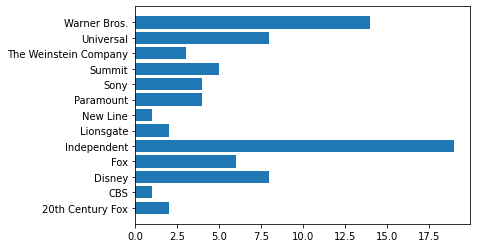

In [6]:
labels = list(dic.keys())
values = dic.values()
plt.barh(labels,values)

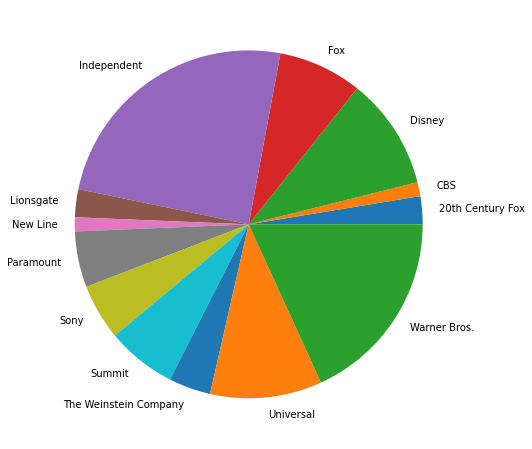

In [7]:
vs = 100*np.array(list(dic.values()))/sum(dic.values())
plt.rcParams['figure.figsize'] = 8,8
plt.pie(vs, labels=labels,explode=None)
plt.show()

In [8]:
cross = pd.crosstab(df['Genre'], df['Year'])
cross

Year,2007,2008,2009,2010,2011
Genre,,,,,
Action,0,0,0,1,0
Animation,0,1,0,1,2
Comdy,0,1,0,0,0
Comedy,6,12,6,16,1
Drama,0,3,5,2,3
Fantasy,0,1,0,0,0
Romance,4,2,0,0,7
Romence,0,0,0,0,1
comedy,0,0,1,0,0


## Error
The names of the movie genres are misspelled.

In [9]:
df.replace(to_replace =["Comdy", "comedy"],value ="Comedy",inplace=True)
df.replace(to_replace =["Romence", "romance"],value ="Romance",inplace=True)
cross = pd.crosstab(df['Genre'], df['Year'])
cross

Year,2007,2008,2009,2010,2011
Genre,,,,,
Action,0,0,0,1,0
Animation,0,1,0,1,2
Comedy,6,13,7,16,1
Drama,0,3,5,2,3
Fantasy,0,1,0,0,0
Romance,5,2,0,0,8


<AxesSubplot:xlabel='Year', ylabel='Genre'>

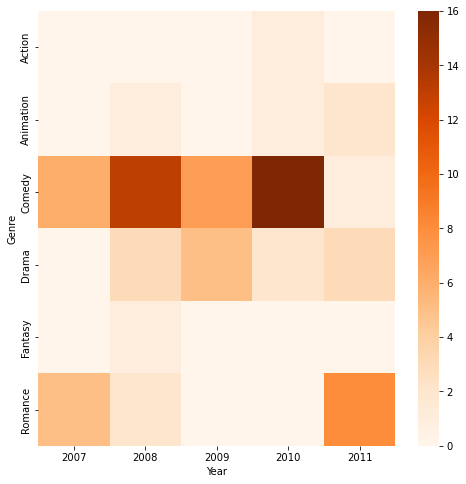

In [10]:
sns.heatmap(cross, cmap='Oranges')

## Question #2

For this question, we are going to use the [Open Flight Data](https://openflights.org/data.html#route).

1. Find the link for the data from the link I gave above. Ingest it as a pandas data frame.

2. Inspect it and explain what it contains.

3. Construct a data frame that contains 3 columns: source airport, target airport and the number of flights from source to target.

4. Filter the data frame and select only the routes that has 10 or more flights between them.

5. Construct a network using the `networkx` library that I used in our last lecture using the data frame you constructed in the previous step.

6. Visualize the network.

## Data
The data includes the routes of the flights made in June 2014. The data includes the airline company, source airline, destination airline and equipment used in the flight.

In [11]:
df2=pd.read_csv('https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat',names=['Airline','Airline ID','Source airport','Source airport ID','Destination airport','Destination airport ID','Codeshare','Stops','Equipment'])
df2

,Airline,Airline ID,Source airport,Source airport ID,Destination airport,Destination airport ID,Codeshare,Stops,Equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2
...,...,...,...,...,...,...,...,...,...
67658,ZL,4178,WYA,6334,ADL,3341,NaN,0,SF3
67659,ZM,19016,DME,4029,FRU,2912,NaN,0,734
67660,ZM,19016,FRU,2912,DME,4029,NaN,0,734
67661,ZM,19016,FRU,2912,OSS,2913,NaN,0,734


In [12]:
a2=df2[['Source airport','Destination airport']]
a2

,Source airport,Destination airport
0,AER,KZN
1,ASF,KZN
2,ASF,MRV
3,CEK,KZN
4,CEK,OVB
...,...,...
67658,WYA,ADL
67659,DME,FRU
67660,FRU,DME
67661,FRU,OSS


I grouped the data for each specific route has been made and then counted

In [13]:
b2=a2.groupby(['Source airport','Destination airport']).size().reset_index(name="number of flights")
b2

,Source airport,Destination airport,number of flights
0,AAE,ALG,1
1,AAE,CDG,1
2,AAE,IST,1
3,AAE,LYS,1
4,AAE,MRS,2
...,...,...,...
37590,ZYI,SZX,1
37591,ZYI,WUH,1
37592,ZYI,XIY,1
37593,ZYI,XMN,1


The flights of routes with 10 or more flights.

In [15]:
edges=b2[b2['number of flights']>=10]
edges

,Source airport,Destination airport,number of flights
853,AKL,SYD,10
1939,ATL,DEN,11
1940,ATL,DFW,11
1990,ATL,JFK,10
1995,ATL,LAX,10
...,...,...,...
30209,SIN,DPS,10
30242,SIN,KUL,10
32027,SYD,AKL,11
33406,TPE,NRT,10


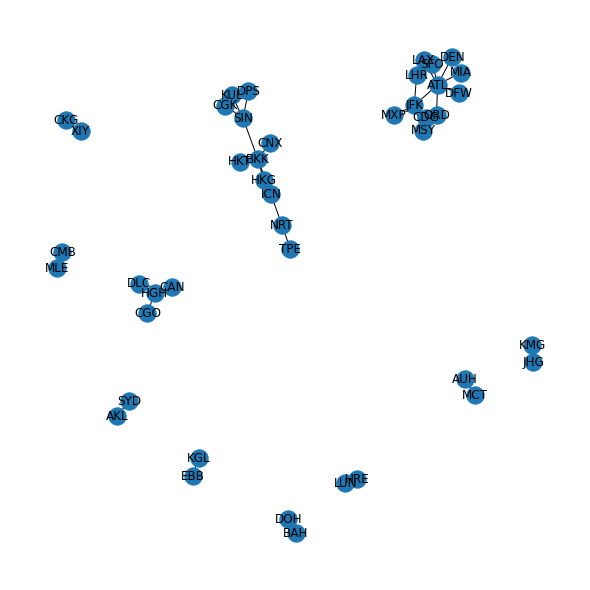

In [16]:
G=nx.from_pandas_edgelist(edges, 'Source airport', 'Destination airport')
nx.draw(G, with_labels=True)
plt.show()

## Question #3

For this question we are going to use the [NBA Data](https://sports-statistics.com/sports-data/nba-basketball-datasets-csv-files/) that I have shown you in our last lecture.

1. Ingest the 2019 data as a pandas data frame.

2. Inspect it and explain what it contains.

3. Write a function that takes two arguments: the NBA data frame and a 'game type' argument which can be 'regular' or 'playoff'. The function must return another pandas data frame of list of players, the number of asists, blocks and rebounds for each player. Evaluate your function on both regular games, and then on playoff games.

4. Write another function that takes two argumentas as before: the NBA data frame and the game type. The function must return the list of teams and the number of wins during the regular season or the play offs as a data frame. Visualize the returned data frame as a bar chart for both regular games, and then on playoff games.

## Data
The data includes NBA matches in the 2019-2020 season. It contains the results of each match and the events that happened in the matches. we can access detailed information such as the time of the shot, who made it, where it was made, how many points.

In [24]:
df3=pd.read_csv('https://sports-statistics.com/database/basketball-data/nba/2019-20_pbp.csv')
df3

,URL,GameType,Location,Date,Time,WinningTeam,Quarter,SecLeft,AwayTeam,AwayPlay,...,EnterGame,LeaveGame,TurnoverPlayer,TurnoverType,TurnoverCause,TurnoverCauser,JumpballAwayPlayer,JumpballHomePlayer,JumpballPoss,Unnamed: 40
0,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,720,NOP,Jump ball: D. Favors vs. M. Gasol (L. Ball gai...,...,NaN,NaN,NaN,NaN,NaN,NaN,D. Favors - favorde01,M. Gasol - gasolma01,L. Ball - balllo01,NaN
1,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,708,NOP,L. Ball misses 2-pt jump shot from 11 ft,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,707,NOP,Offensive rebound by D. Favors,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,707,NOP,D. Favors makes 2-pt layup at rim,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,689,NOP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539260,/boxscores/202010110MIA.html,playoff,The Arena Bay Lake Florida,October 11 2020,7:30 PM,LAL,4,29,LAL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
539261,/boxscores/202010110MIA.html,playoff,The Arena Bay Lake Florida,October 11 2020,7:30 PM,LAL,4,20,LAL,D. Howard makes 3-pt jump shot from 30 ft (ass...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
539262,/boxscores/202010110MIA.html,playoff,The Arena Bay Lake Florida,October 11 2020,7:30 PM,LAL,4,15,LAL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
539263,/boxscores/202010110MIA.html,playoff,The Arena Bay Lake Florida,October 11 2020,7:30 PM,LAL,4,0,LAL,End of 4th quarter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The function takes dataframe and game type inputs. I got rid of the empty parts with notna(). Organized data by game type and split data by '-'. I added ones column because assists, blocks and rebounds each have a value of 1. New dataframe is created according to the given list and merged with the one to be created in the next step.

In [25]:
def stat(df3,typ):
    game=df3[df3['GameType']==typ]
    lis=['Assister','Blocker','Rebounder']
    for i in lis:
        x=game[game[i].notna()]
        x=x[i].str.split('-',expand = True)
        x.rename(columns={0:'Name'},inplace=True)
        x.drop([1,2], axis=1, inplace=True)
        n=x.index.size
        r=np.ones(n)
        x[i]=r
        dp=x.groupby('Name').count()
        if i=='Assister':
            dp1=dp
        elif i=='Blocker':
            dp1=pd.merge(dp1,dp,left_index=True, right_index=True)
        else:
            dp1=pd.merge(dp1,dp,left_index=True, right_index=True)
            dp1.columns=['asists','blocks','rebounds']
            return dp1

In [26]:
dene1=stat(df3,'regular')
dene1

,asists,blocks,rebounds
Name,,,
A. Aminu,21,8,87
A. Baynes,67,23,237
A. Bradley,63,5,115
A. Burks,189,17,282
A. Caruso,124,18,123
...,...,...,...
Y. Watanabe,5,1,20
Z. Cheatham,3,1,9
Z. Collins,16,5,70


The function takes dataframe and game type inputs. I grouped the winning team and match dates together to reach the wins of each team in the season. then I merged the win numbers and team information.

In [27]:
def teams(df3,typ):
    game=df3[df3['GameType']==typ]
    game=game.groupby(['WinningTeam','Date']).count()
    game.reset_index(inplace=True)
    game=game['WinningTeam'].value_counts()

    g1 = pd.DataFrame(data=game.index, columns=['Teams'])
    g2 = pd.DataFrame(data=game.values, columns=['Wins'])
    game1 = pd.merge(g1, g2, left_index=True, right_index=True)
    return game1

In [28]:
dene2=teams(df3,'regular')
dene2

,Teams,Wins
0,MIL,56
1,TOR,53
2,LAL,52
3,LAC,49
4,BOS,48
5,DEN,46
6,IND,45
7,MIA,44
8,HOU,44
9,UTA,44
